In [83]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [82]:
#Reading data
df = pd.read_csv('Fossil.csv', index_col = 0)

In [84]:
import geopandas as gpd
from geopandas import GeoSeries

from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap
import json

In [85]:
shape = gpd.read_file('99bfd9e7-bb42-4728-87b5-07f8c8ac631c2020328-1-1vef4ev.lu5nk.shp')
#Countries_shape
file_name = 'Country shape codes.txt'

with open(file_name) as f:
    dict_codes = json.load(f)


shape.crs = {'init': 'EPSG:4326'}    
world = shape.to_crs('EPSG:4326')
world = world.replace({'CNTRY_NAME':dict_codes})
world = world.set_index('CNTRY_NAME')
world = world[world.index!="ATA"]


c:\Users\rauli\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [86]:
#Creating a geoseries object
g = GeoSeries(world['geometry'])

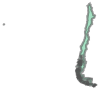

In [87]:
g['CHL']

In [88]:
#Calculation of countries center
node_pos = g.centroid
node_pos = node_pos.to_crs("EPSG:4326")

#x, y = node_pos[0].coords.xy
node_pos_xy = dict.fromkeys(node_pos.index)
for i, country in enumerate(node_pos.index):
    x, y = node_pos[i].coords.xy
    node_pos_xy[country] = np.array([x[0], y[0]])

C:\Users\rauli\AppData\Local\Temp\ipykernel_18208\2258041188.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  node_pos = g.centroid


In [89]:
#Deleting some columns without any flows
idx0 = df.index[np.sum(df, axis = 0)>0]
idx1 = df.index[np.sum(df, axis = 1)>0]
idx_filter = idx0.union(idx1)
idx_filter = idx_filter.intersection(world.index)

In [90]:
df.dtypes

ABW      int64
AFG      int64
AGO      int64
AIA      int64
ALB      int64
        ...   
WSM      int64
YEM      int64
ZAF    float64
ZMB      int64
ZWE      int64
Length: 234, dtype: object

In [91]:
options = {
    'node_size': 10,
    'width': .05, 
    'with_labels':False
}

In [92]:
df.shape

(234, 234)

In [93]:
G= nx.Graph(df.loc[idx_filter, idx_filter])

In [94]:
G.is_multigraph()

False

In [95]:
k = 3
#subnetwork induced by the nodes in k-shell
subnetwork_shell = nx.k_shell(G, k)

#subnetwork induced by the nodes in k-core
subnetwork_core = nx.k_core(G, k)


core_color = 'red'
shell_color = 'blue'

colors = dict()

for node in G.nodes:
    if node in subnetwork_core.nodes:
        colors[node] = core_color
    else:
        colors[node] = shell_color

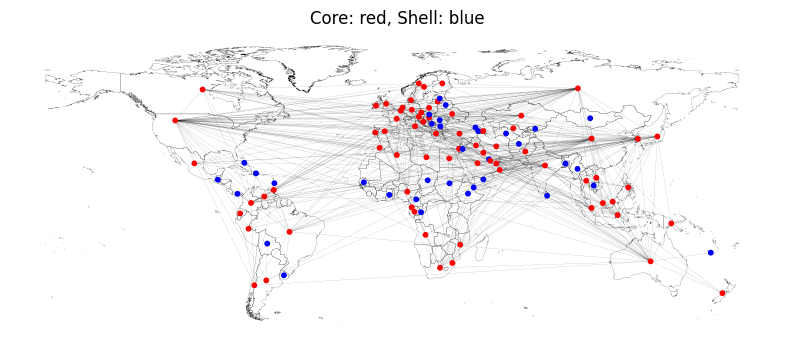

In [96]:
f, ax = plt.subplots(figsize=(10, 10))
world.boundary.plot(ax=ax, edgecolor='black', linewidth=.1)
ax.set_axis_off()

nx.draw_networkx(G, pos = node_pos_xy, node_color = list(colors.values()), arrows = True, arrowsize = 5, **options)
plt.title('Core: ' + core_color + ', Shell: '+shell_color)
plt.show()